# Image Data Generator


In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.15.0'

## 1. Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

### wget From Github
* 'dogs_and_cats_small.zip' 파일 다운로드


In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip

--2024-04-09 04:51:24--  https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90618980 (86M) [application/zip]
Saving to: ‘dogs_and_cats_small.zip’

dogs_and_cats_small 100%[===================>]  86.42M   115MB/s    in 0.8s    

2024-04-09 04:51:26 (115 MB/s) - ‘dogs_and_cats_small.zip’ saved [90618980/90618980]



* 다운로드 결과 확인

In [4]:
!ls -l

total 88500
-rw-r--r-- 1 root root 90618980 Apr  9 04:51 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Apr  5 13:21 sample_data


## 2. Data Preprocessing

### 1) Unzip 'dogs_and_cats_small.zip'

In [5]:
!unzip -q /content/dogs_and_cats_small.zip

* 학습 데이터 확인

In [6]:
!ls -l

total 88512
-rw-r--r-- 1 root root 90618980 Apr  9 04:51 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Apr  5 13:21 sample_data
drwxr-xr-x 4 root root     4096 Apr  9 04:51 test
drwxr-xr-x 4 root root     4096 Apr  9 04:51 train
drwxr-xr-x 4 root root     4096 Apr  9 04:51 validation


### 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [7]:
train_dir = './train'
valid_dir = './validation'
test_dir  = './test'

### 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
 * Generate batches of tensor image data with real-time data augmentation.
* Resizing & Generator
 * flow_from_directory( )
 * Takes the path to a directory & generates batches of augmented data.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 0~1 scaling
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 4) Test train_generator

In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [10]:
labels_batch

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1.], dtype=float32)

## 3. CNN Keras Modeling

### 1) Model Define

* Feature Extraction & Classification

In [11]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### 2) Model Compile

* 모델 학습방법 설정

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### 3) Model Fit

* 모델 학습 수행
 * 약 10분

In [14]:
# %%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 30,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 11s 48ms/step - loss: 0.6964 - accuracy: 0.5155 - val_loss: 0.6892 - val_accuracy: 0.5570
Epoch 2/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6885 - accuracy: 0.5195 - val_loss: 0.6833 - val_accuracy: 0.5440
Epoch 3/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6837 - accuracy: 0.5235 - val_loss: 0.6836 - val_accuracy: 0.5760
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6720 - accuracy: 0.5845 - val_loss: 0.6759 - val_accuracy: 0.5590
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6460 - accuracy: 0.6445 - val_loss: 0.6565 - val_accuracy: 0.6170
Epoch 6/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6123 - accuracy: 0.6725 - val_loss: 0.6483 - val_accuracy: 0.6390
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5798 - accuracy: 0.7010 - val_loss: 0.5985 - val_accuracy: 0.697

### 4) 학습 결과 시각화

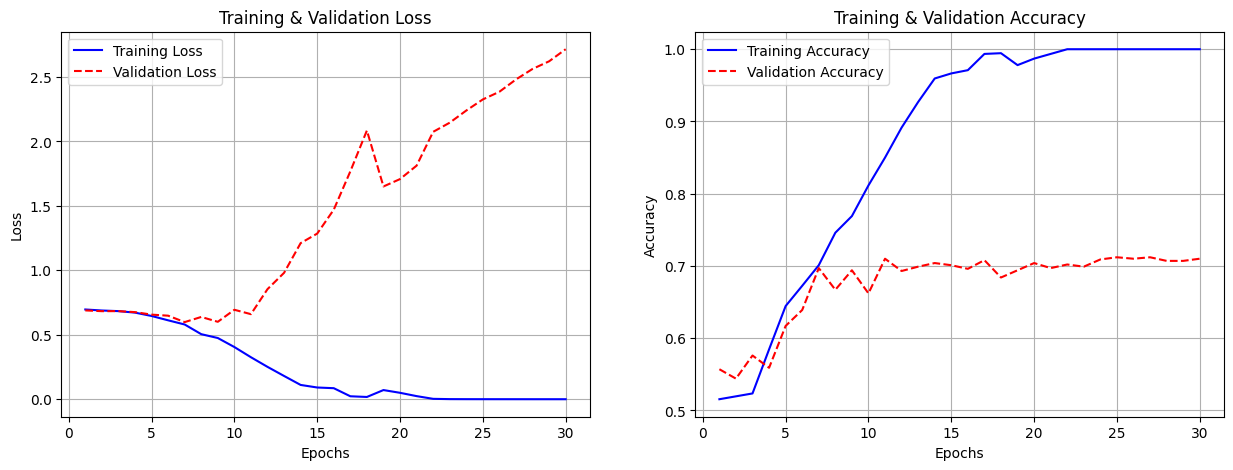

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

### 5) Model Evaluate

* test_generator

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [17]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.47099
Accuracy = 0.71900


## 4. Model Save & Load to Google Drive

### 1) Google Drive Mount

* Mount Google Drive

In [18]:
# from google.colab import drive

# drive.mount('/content/drive')

* Make 'models' Directory

In [19]:
# !mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

### 2) Model Save

In [20]:
# model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')
model.save('dogs_and_cats_small.h5')

In [21]:
# !ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

### 3) Model Load

In [22]:
from tensorflow.keras.models import load_model

# model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')
model_small = load_model('dogs_and_cats_small.h5')

In [23]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50,
                                      verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.47099
Accuracy = 0.71900


# 이미지 증강(Image Augmentation)을 사용하여 CNN 학습

> # Overfitting 대응책

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

* Import TensorFlow

In [ ]:
# import tensorflow as tf

# tf.__version__

'2.10.0'

## 1. wget From Github
* 'dogs_and_cats_small.zip' 파일 다운로드

In [ ]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip

--2023-01-26 01:28:42--  https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90618980 (86M) [application/zip]
Saving to: ‘dogs_and_cats_small.zip’

dogs_and_cats_small 100%[===================>]  86.42M   289MB/s    in 0.3s    

2023-01-26 01:28:43 (289 MB/s) - ‘dogs_and_cats_small.zip’ saved [90618980/90618980]



* 다운로드 결과 확인

In [ ]:
# !ls -l

total 88500
-rw-r--r-- 1 root root 90618980 Jan 26 01:28 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Jan 24 14:38 sample_data


### 1) Unzip 'dogs_and_cats_small.zip'

In [ ]:
# !unzip -q /content/dogs_and_cats_small.zip

* 학습 데이터 확인

In [ ]:
# !ls -l

total 88512
-rw-r--r-- 1 root root 90618980 Jan 26 01:28 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Jan 24 14:38 sample_data
drwxr-xr-x 4 root root     4096 Jan 26 01:28 test
drwxr-xr-x 4 root root     4096 Jan 26 01:28 train
drwxr-xr-x 4 root root     4096 Jan 26 01:28 validation


### 2) <font color = 'red'>[Optional]</font> Image Augmentation Test

* rotation_range = 40: 0도 ~ 40도 범위에서 임의로 이미지 회전
* width_shift_range = 0.2: -20% ~ +20% 범위에서 이미지 좌우 이동
* height_shift_range = 0.2: -20% ~ +20% 범위에서 이미지 상하 이동
* shear_range = 0.2: 최대 20% 비율로 시계 반대방향으로 기울어져 변형
* zoom_range = 0.2: 80%에서 120% 범위에서 이미지 확대/축소
* horizontal_flip = True: 임의로 이미지 수평방향 뒤집기
* vertical_flip = True: 임의로 이미지 수직방향 뒤집기
* brightness_range = [0.5, 1.5]: -50% ~ +50% 범위에서 이미지 밝기 조절
* fill_mode = 'nearest': 주변 픽셀로 이미지 채우기

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             brightness_range = [0.5, 1.5],
                             fill_mode = 'nearest')

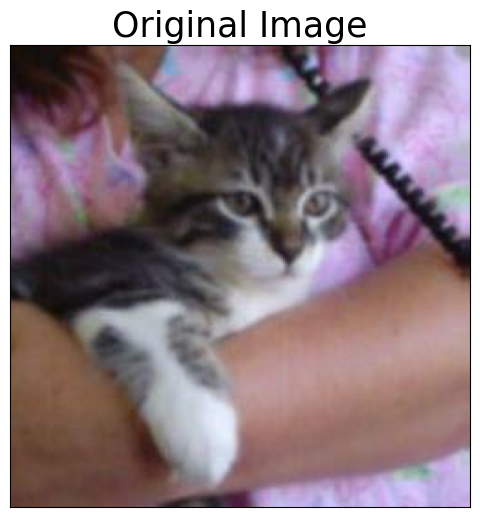

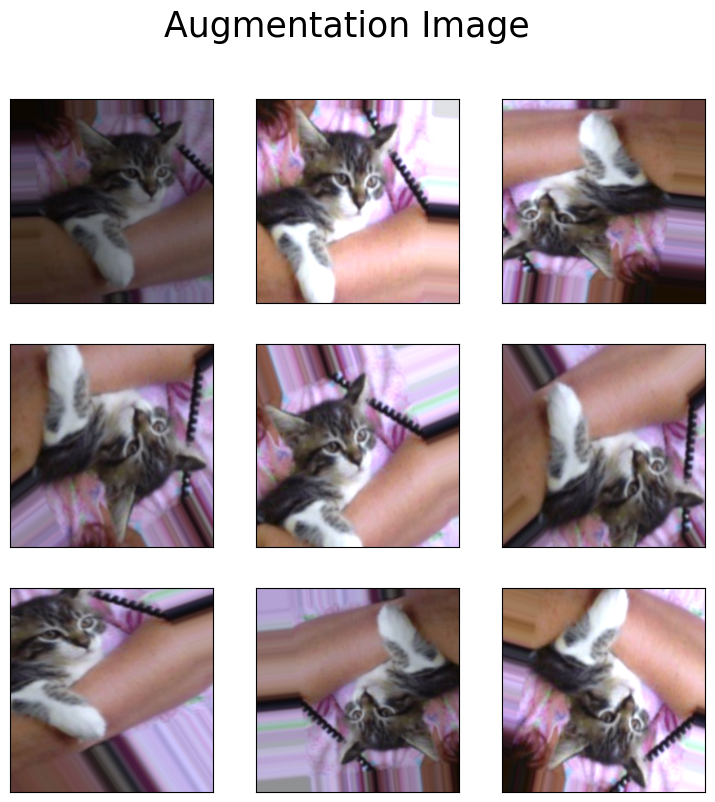

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as np

CAT = img_to_array(load_img('./train/cats/cat.168.jpg')).astype(int)
plt.figure(figsize = (6, 6))
plt.xticks([])
plt.yticks([])
plt.title('Original Image', fontsize = 25)
plt.imshow(CAT)


CAT = CAT.reshape((1, ) + CAT.shape)
train_generator = datagen.flow(CAT, batch_size = 1)

fig = plt.figure(figsize = (9, 9))
fig.suptitle('Augmentation Image', fontsize = 25)
for i in range(9):
    data = next(train_generator) # next함수는 iterator객체에서 값을 차례대로 가져온다.
    image = data[0]
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = int))
plt.show()

## 2. Data Preprocessing

### 1) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [26]:
train_dir = './train'
valid_dir = './validation'
test_dir  = './test'

### 2) ImageDataGenerator( ) & flow_from_directory( )
* with Augementation vs without Augmentation

* Normalization & Augmentation
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   fill_mode = 'nearest')

# Without Augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)



# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 3. CNN Keras Modeling

### 1) Model Define

* Feature Extraction & Classification
 * Dropout Layer

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

### 2) Model Compile

* 모델 학습방법 설정

In [30]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### 3) Model Fit

* 약 32분
 * epochs : 60 -> 100

In [31]:
# %%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 18s 161ms/step - loss: 0.6927 - accuracy: 0.5245 - val_loss: 0.6711 - val_accuracy: 0.5580
Epoch 2/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6818 - accuracy: 0.5520 - val_loss: 0.6778 - val_accuracy: 0.5670
Epoch 3/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6944 - accuracy: 0.5155 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 16s 162ms/step - loss: 0.7000 - accuracy: 0.5080 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6945 - accuracy: 0.4940 - val_loss: 0.6915 -

### 4) 학습 결과 시각화

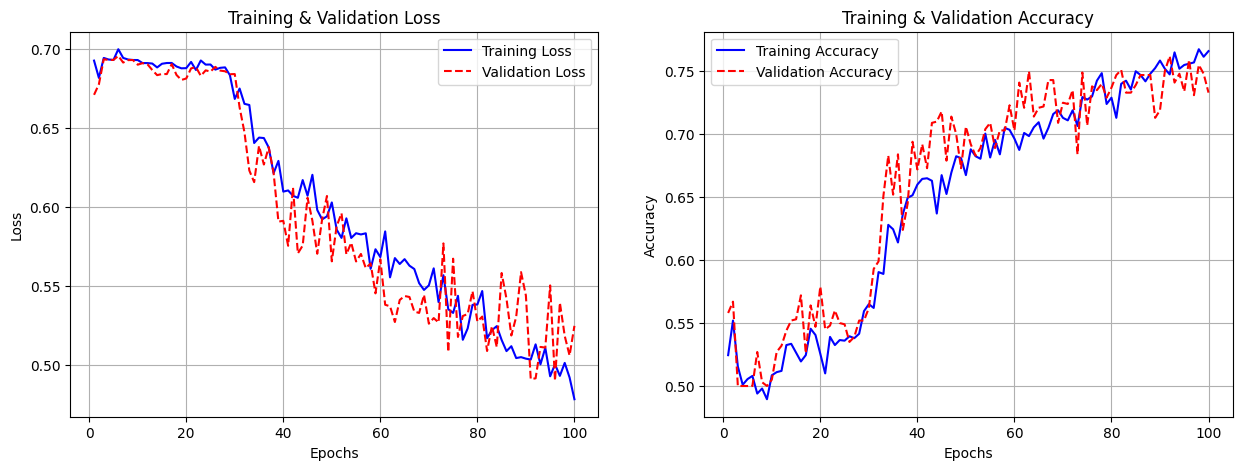

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

### 5) Model Evaluate

* test_generator

In [33]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [34]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.54164
Accuracy = 0.72100


# The End